In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression 

In [ ]:
A, B = make_classification(n_samples=20, n_features=8, )

In [ ]:
A = pd.DataFrame(A)
A.head()

,0,1,2,3,4,5,6,7,label
0,0.407637,-1.972207,0.619412,-0.484845,1.220468,-1.394379,-1.919514,1.358201,1
1,-0.214209,-0.563432,0.169357,-1.478887,0.387742,-0.053268,-0.662509,0.858016,1
2,-0.180266,-0.601447,0.191986,-0.912289,-1.329451,0.045556,-0.538980,0.223132,0
3,0.238945,-1.726749,0.544470,0.100477,0.829860,-0.200807,-1.648330,1.056212,1
4,0.310437,-0.440540,0.134076,0.077628,-2.195532,-2.007681,-0.493112,0.568351,0


In [ ]:
A['label'] = B

In [ ]:
X = A.drop('label', axis=1).copy()
Y = A['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
proba = lr.predict_proba(X_test)
proba

array([[0.53158809, 0.46841191],
       [0.15695275, 0.84304725],
       [0.5879915 , 0.4120085 ],
       [0.88248981, 0.11751019],
       [0.02501986, 0.97498014]])

In [ ]:
predict = lr.predict(X_test)
predict

array([0, 1, 0, 0, 1])

In [ ]:
X_test['predict'] = predict

In [ ]:
X_test['target'] = y_test

In [ ]:
X_test['proba'] = proba[:,1]

In [ ]:
X_test

,0,1,2,3,4,5,6,7,predict,target,proba
15,-1.509248,0.378919,-0.120211,0.990779,0.824967,-0.966165,0.350715,-0.186496,0,0,0.468412
4,0.310437,-0.440540,0.134076,0.077628,-2.195532,-2.007681,-0.493112,0.568351,1,0,0.843047
14,0.338740,0.112806,-0.037800,0.433405,-1.164982,-0.225446,0.074181,0.068961,0,1,0.412009
13,-0.745943,1.020908,-0.318898,2.035185,0.973826,0.507887,1.019749,-0.810621,0,0,0.117510
19,0.359475,-0.430892,0.098556,-0.645223,-0.238081,-0.379764,-0.971587,2.570762,1,1,0.974980


In [ ]:
fpr, tpr, thresholds = roc_curve(X_test['target'], X_test['proba'])

In [ ]:
d = {'fpr': fpr, 'tpr': tpr, 'thr': thresholds}

In [ ]:
curve = pd.DataFrame(d)
curve

,fpr,tpr,thr
0,0.000000,0.0,1.974980
1,0.000000,0.5,0.974980
2,0.666667,0.5,0.468412
3,0.666667,1.0,0.412009
4,1.000000,1.0,0.117510


In [ ]:
import seaborn as sns

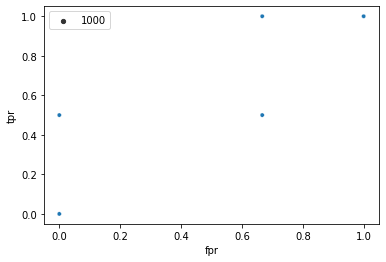

In [ ]:
sns.scatterplot(data=curve, x="fpr", y="tpr")

If we calculate the area, we should get the same thing as the built-in function. In this case we get about ~ 0.65


In [ ]:
roc_auc_score(X_test['target'], X_test['proba'])

0.6666666666666667

We can see that our calculations are correct